# Text classification with an RNN

## Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow_datasets as tfds
import tensorflow as tf

TensorFlow 2.x selected.


Import `matplotlib` and create a helper function to plot graphs:

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Setup input pipeline

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder

In [5]:
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [0]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
  print ('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


## Prepare the data for training

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

## Create the model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Train the model

In [13]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 137s 351ms/step - loss: 0.6576 - accuracy: 0.5906 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 127s 324ms/step - loss: 0.3819 - accuracy: 0.8447 - val_loss: 0.3498 - val_accuracy: 0.8568
Epoch 3/10
391/391 [==============================] - 127s 324ms/step - loss: 0.2727 - accuracy: 0.8966 - val_loss: 0.3148 - val_accuracy: 0.8771
Epoch 4/10
391/391 [==============================] - 127s 325ms/step - loss: 0.2228 - accuracy: 0.9200 - val_loss: 0.3238 - val_accuracy: 0.8687
Epoch 5/10
391/391 [==============================] - 127s 326ms/step - loss: 0.1968 - accuracy: 0.9308 - val_loss: 0.3191 - val_accuracy: 0.8760
Epoch 6/10
391/391 [==============================] - 127s 324ms/step - loss: 0.1703 - accuracy: 0.9426 - val_loss: 0.3424 - val_accuracy: 0.8708
Epoch 7/10
391/391 [==============================] - 126s 323ms/step - loss: 0.1548 - accuracy: 0.9474 - val_loss: 

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 48s 122ms/step - loss: 0.4534 - accuracy: 0.8600
Test Loss: 0.45340008033282314
Test Accuracy: 0.8600000143051147


In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predict(sentence, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [17]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.5690927]]


In [18]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.6138017]]


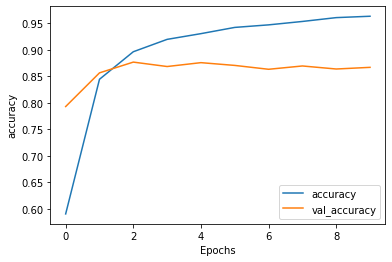

In [19]:
plot_graphs(history, 'accuracy')

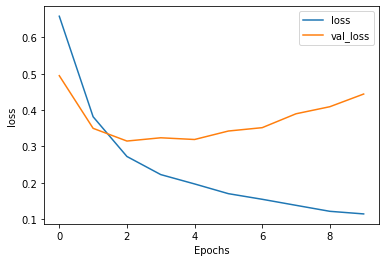

In [20]:
plot_graphs(history, 'loss')

## Stack two or more LSTM layers

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 243s 622ms/step - loss: 0.6383 - accuracy: 0.6068 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 234s 599ms/step - loss: 0.3547 - accuracy: 0.8618 - val_loss: 0.3456 - val_accuracy: 0.8521
Epoch 3/10
391/391 [==============================] - 233s 595ms/step - loss: 0.2606 - accuracy: 0.9079 - val_loss: 0.3413 - val_accuracy: 0.8698
Epoch 4/10
391/391 [==============================] - 232s 594ms/step - loss: 0.2155 - accuracy: 0.9297 - val_loss: 0.3194 - val_accuracy: 0.8766
Epoch 5/10
391/391 [==============================] - 233s 595ms/step - loss: 0.1840 - accuracy: 0.9422 - val_loss: 0.3515 - val_accuracy: 0.8672
Epoch 6/10
391/391 [==============================] - 232s 594ms/step - loss: 0.1601 - accuracy: 0.9516 - val_loss: 0.3800 - val_accuracy: 0.8656
Epoch 7/10
391/391 [==============================] - 232s 594ms/step - loss: 0.1410 - accuracy: 0.9587 - val_loss: 

In [24]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 89s 227ms/step - loss: 0.5093 - accuracy: 0.8561
Test Loss: 0.5093437566629151
Test Accuracy: 0.8560799956321716


In [25]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.10002458]]


In [26]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.04539321]]


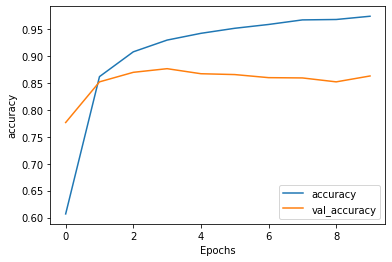

In [27]:
plot_graphs(history, 'accuracy')

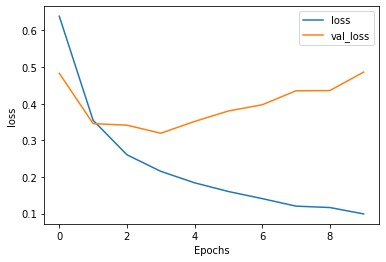

In [28]:
plot_graphs(history, 'loss')